In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def draw_pie(black_tag, attitude_tag, year):
    plt.rcParams['figure.figsize'] = 12, 10
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, rotatelabels = True)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    save_path = 'img/globe_' + str(year) + 'BW_pie'
    plt.rcParams["savefig.format"] = 'png'
    plt.savefig(save_path)
    return plt.show()

In [3]:
def draw_bins(labels, counts, year):
    plt.rcParams['figure.figsize'] = 12, 10
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3500)
    ax.barh(labels, counts)
    save_path = 'img/globe_' + str(year) + 'BW_bins'
    plt.rcParams["savefig.format"] = 'png'
    plt.savefig(save_path)
    return plt.show()

In [4]:
globe_2014 = pd.read_csv('classified_data/globe2014_classified.csv')
globe_2015 = pd.read_csv('classified_data/globe2015_classified.csv')
globe_2016 = pd.read_csv('classified_data/globe2016_classified.csv')
globe_2017 = pd.read_csv('classified_data/globe2017_classified.csv')
globe_2018 = pd.read_csv('classified_data/globe2018_classified.csv')
dfs = [globe_2014, globe_2015, globe_2016, globe_2017, globe_2018]


[86, 60, 0, 1840, 836, 17]
globe_ 2014


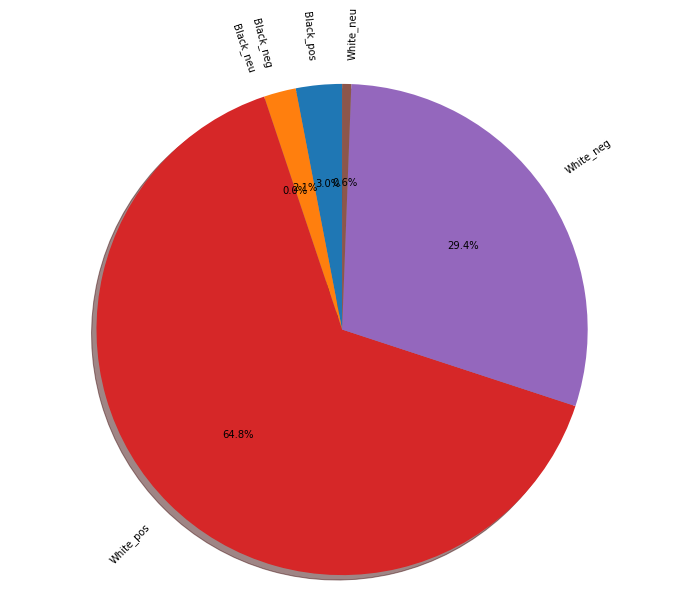

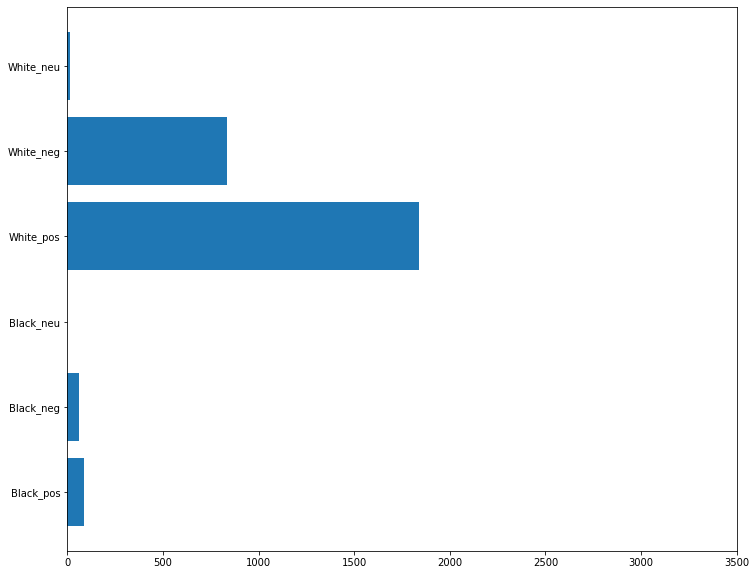

[102, 131, 0, 2380, 1136, 23]
globe_ 2015


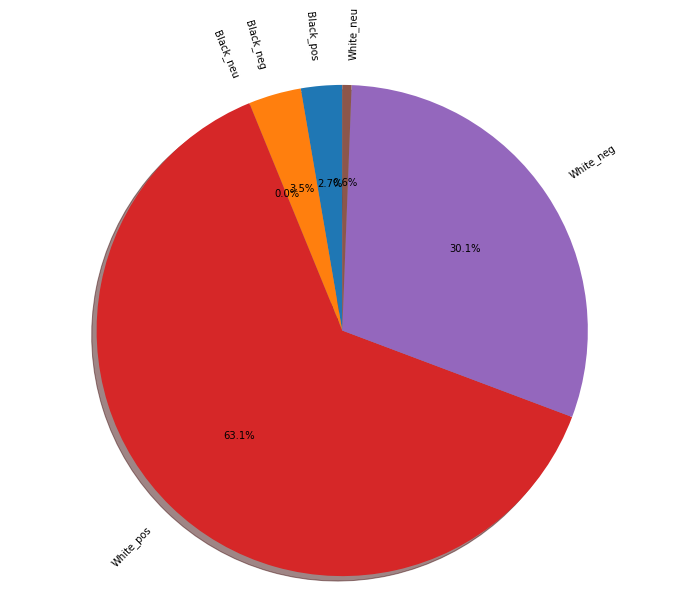

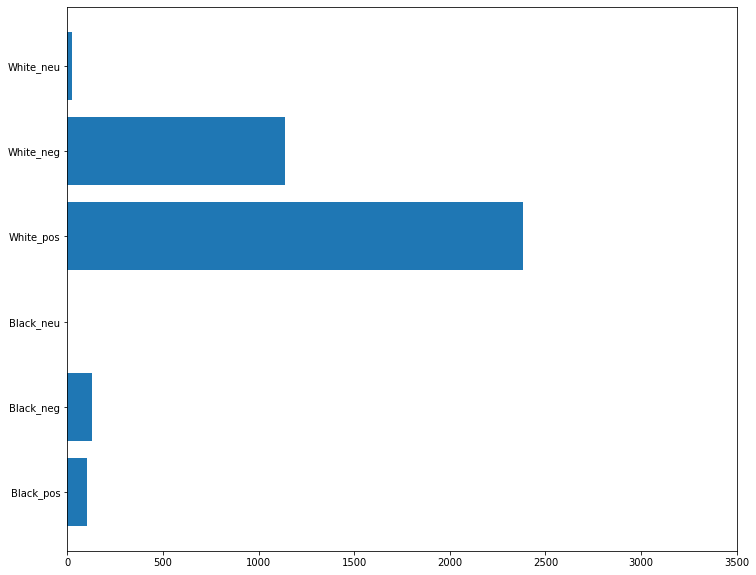

[101, 97, 1, 2398, 1269, 30]
globe_ 2016


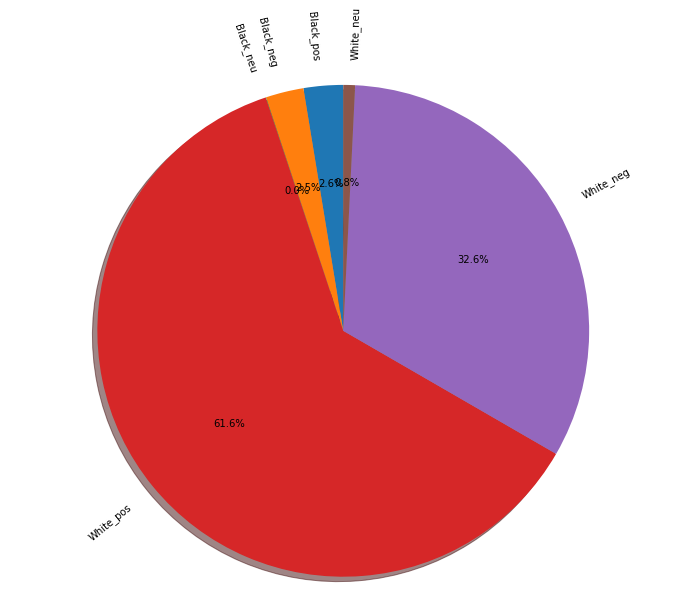

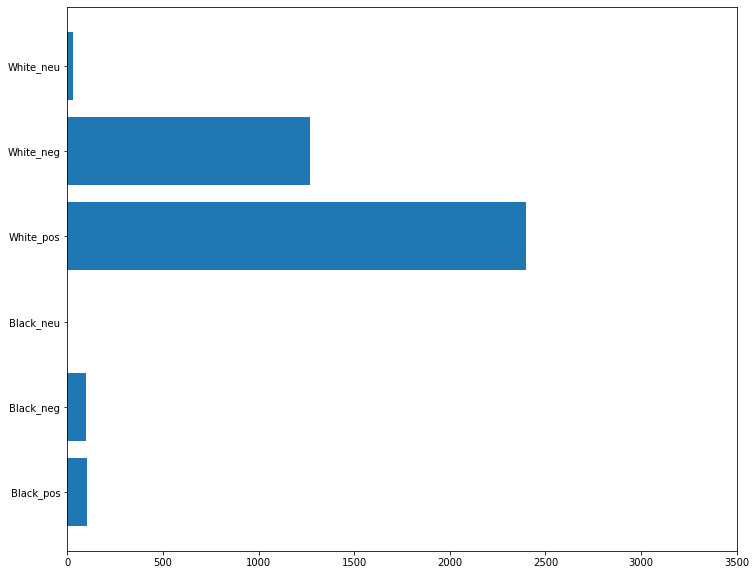

[100, 119, 0, 2281, 1338, 36]
globe_ 2017


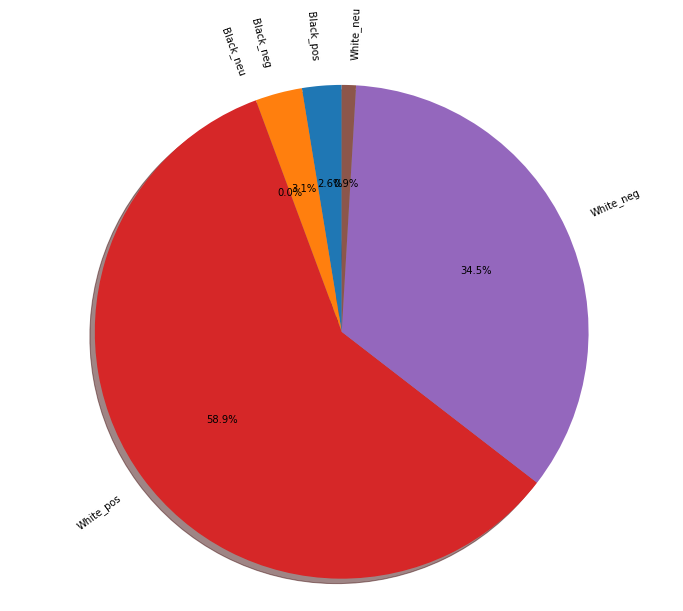

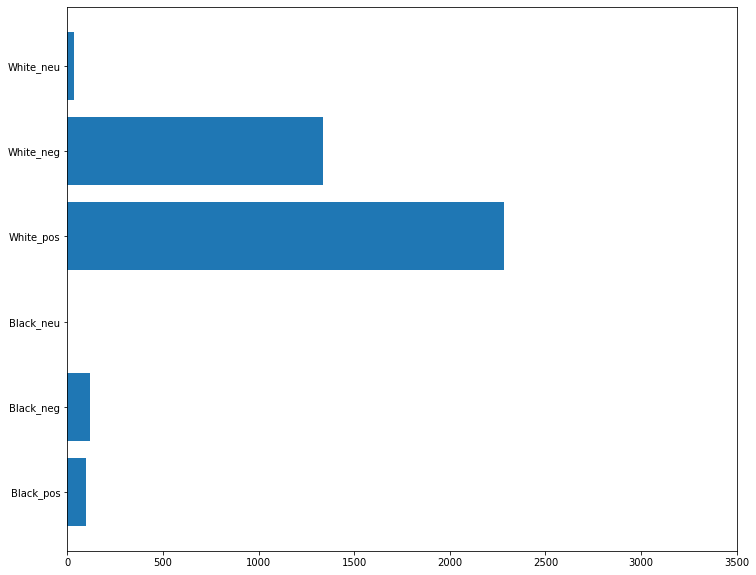

[137, 198, 0, 3250, 1659, 40]
globe_ 2018


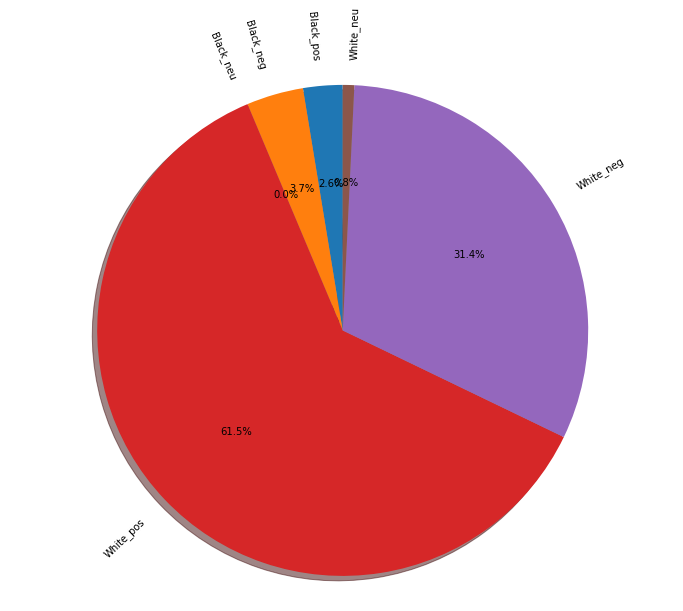

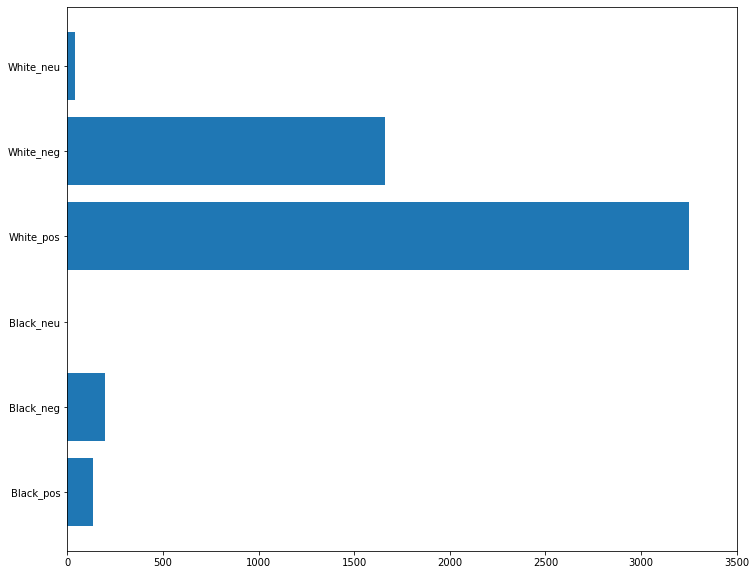

In [6]:
year = 2014
for df in dfs:
    loc_tag = df['Sub-neighborhood']
    black_tag = df['Black or Not [Y/N]']
    attitude_tag = df['Result']
    labels = 'Black_pos', 'Black_neg', 'Black_neu', 'White_pos', 'White_neg', 'White_neu'
    white_pos, white_neg, white_neu, black_pos, black_neg, black_neu = 0, 0, 0, 0, 0, 0
    for i in range(len(df)):
        if black_tag[i] == 'Y':
            if attitude_tag[i] == 'Positive':
                black_pos += 1
            elif attitude_tag[i] == 'Negative':
                black_neg += 1
            else:
                black_neu += 1
        elif black_tag[i] == 'N':
            if attitude_tag[i] == 'Positive':
                white_pos += 1
            elif attitude_tag[i] == 'Negative':
                white_neg += 1
            else:
                white_neu += 1
    sizes = [black_pos, black_neg, black_neu, white_pos, white_neg, white_neu]
    print(sizes)
    print('globe_',year)
    draw_pie(labels, sizes, year)
    draw_bins(labels, sizes, year)
    year += 1

In [13]:
def retrieve_tags(tags):
    tag_ls = []
    for s in tags:
        t = s.replace("'", "").replace('[', '').replace(']', '')
        t = t.split(',')
        t = [x.lstrip() for x in t]
        tag_ls.append(t)
        
    return tag_ls

In [11]:
# all sub_neighborhoods' name
labels = ['Chelsea', 'East Boston', 'Franklin Park', 'Orient Heights', 'Revere', 'Ashmont', 
             'Back Bay', 'Bay Village', 'Beacon Hill', 'Boston', 'Cedar Grove', 'City Point', 
             'Dock Square', 'Dorchester', 'Dorchester Center', 'Dorchester Heights', 'Downtown Crossing',
             'Fields Corner', 'Forest Hills', 'Fort Independence', 'Fort Winthrop', 'Grove Hall',
             'Jamaica Plain', 'Jeffries Point', 'Lower Mills', 'Mattapan', 'Meeting House Hill',
             'Mount Bowdoin', 'Mount Ida', 'Neponset', 'North End', 'Roxbury', 'Roxbury Crossing',
             'Savin Hill', 'South Boston', 'Uphams Corner', 'Cottage Hill', 'Cottage Park', 'Mishawum',
             'Court Park', 'Fort Dawes', 'Fort Warren', 'Point Shirley', 'Beachmont', 'Crescent Beach',
             'Oak Island', 'Point of Pines', 'Suffolk Downs Station', 'Winthrop', 'Winthrop Beach',
             'Winthrop Highlands', 'Aberdeen', 'Allston', 'Bellevue', 'Brighton', 'Clarendon Hills',
             'Faneuil', 'Germantown', 'Highland', 'Hyde Park', 'Mount Hope', 'North Brighton', 'Egypt Beach',
             'Roslindale', 'Stonybrook Village', 'West Roxbury', 'Readville', 'Fairmount', 'Chinatown', 'Charlestown'] 
neigh = ['Allston', 'Back Bay', 'Bay Village', 'Beacon Hill', 'Brighton', 'Charlestown', 
             'Dorchester', 'Downtown', 'East Boston', 'Fenway', 'Harbor Islands', 'Hyde Park',
             'Jamaica Plain', 'Longwood Medical Area', 'Mattapan', 'Mission Hill', 'North End', 
             'Roslindale', 'Roxbury', 'South Boston', 'South Boston Waterfront', 'South End', 
             'West End', 'West Roxbury', 'Chelsea', 'Revere', 'Winthrop', '']

In [21]:
def get_loc_plot_data(data):
#     pos = [0] * len(labels)
#     neg = [0] * len(labels)
#     neu = [0] * len(labels)
    
    pos = [0] * len(neigh)
    neg = [0] * len(neigh)
    neu = [0] * len(neigh)
#     loc_tag = retrieve_tags(data['Sub-neighborhood'])

    loc_tag = retrieve_tags(data['Neighborhood'])
    attitude_tag = data['Result']
    
    for i in range(len(data)):
        for loc in loc_tag[i]:
#             idx = labels.index(loc)
            idx = neigh.index(loc)
            if attitude_tag[i] == 'Positive':
                pos[idx] += 1
            elif attitude_tag[i] == 'Negative':
                neg[idx] += 1
    #         else:
    #             neu[idx] += 1

    df = pd.DataFrame(list(zip(labels, pos, neg, neu)), #columns =['neighborhood', 'pos', 'neg', 'neu'])
                  columns =['neighborhood', 'pos', 'neg', 'neu'])

    ''' if a article mentioned no neighborhood, we remove it from our chart '''
    drop_idx = []
    for i in range(len(df)):
        if df['pos'][i] == 0 and df['neg'][i] == 0 and df['neu'][i] == 0:
            drop_idx.append(i)

    df = df.drop(drop_idx)
    bos_idx = labels.index('Boston')
    df = df.drop(bos_idx)
    # print(df)
    return df

In [19]:
def draw_loc_plot(df, year):
    x = np.arange(len(df))  # the label locations
    width = 0.35  # the width of the bars
    plt.rcParams['figure.figsize'] = 12, 10
    fig, ax = plt.subplots(constrained_layout=False)
    ax.bar(x - width/2, df['pos'], width, label='pos')
    ax.bar(x + width/2, df['neg'], width, label='neg')
    # ax.bar(x + 2*width/3, df['neu'], width, label='neu')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Counts')
    ax.set_title('Article counts for each larger neighborhood in ' + str(year))
    
    plt.xticks(x, df['neighborhood'], rotation='vertical')
    ax.legend()
    save_path = 'img/globe_' + str(year) #+ '_sub'
    plt.rcParams["savefig.format"] = 'png'
    plt.savefig(save_path)
    return plt.show()

globe_ 2014


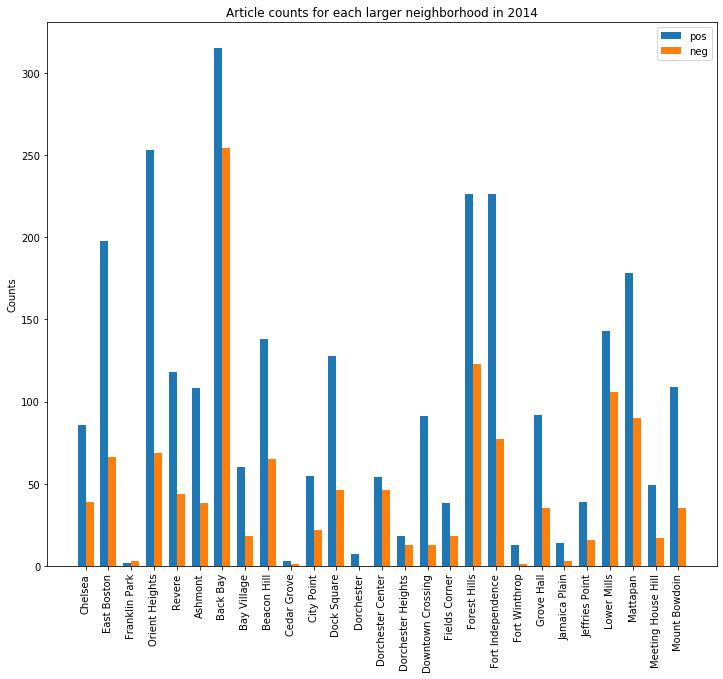

globe_ 2015


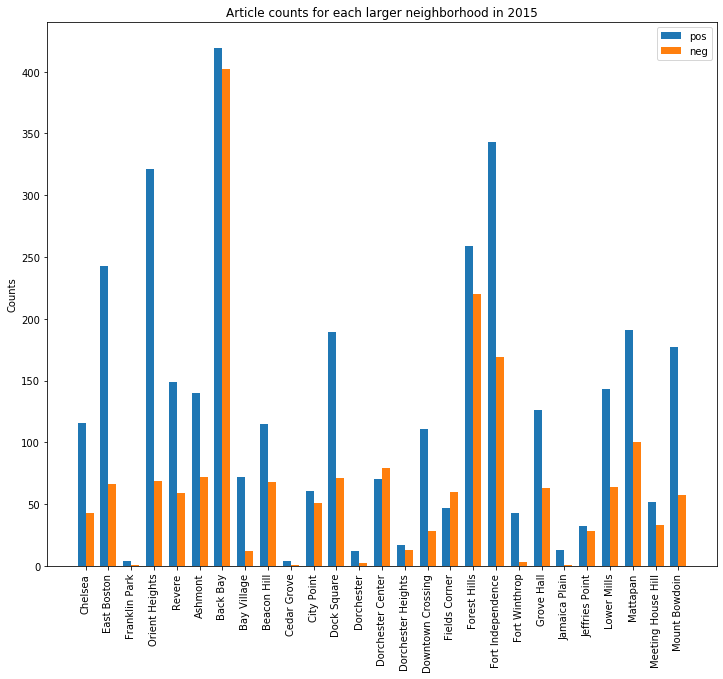

globe_ 2016


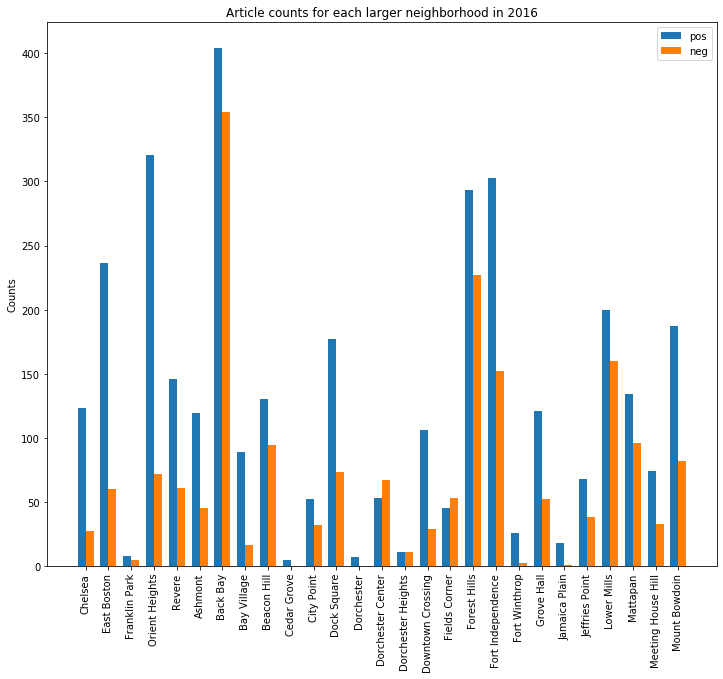

globe_ 2017


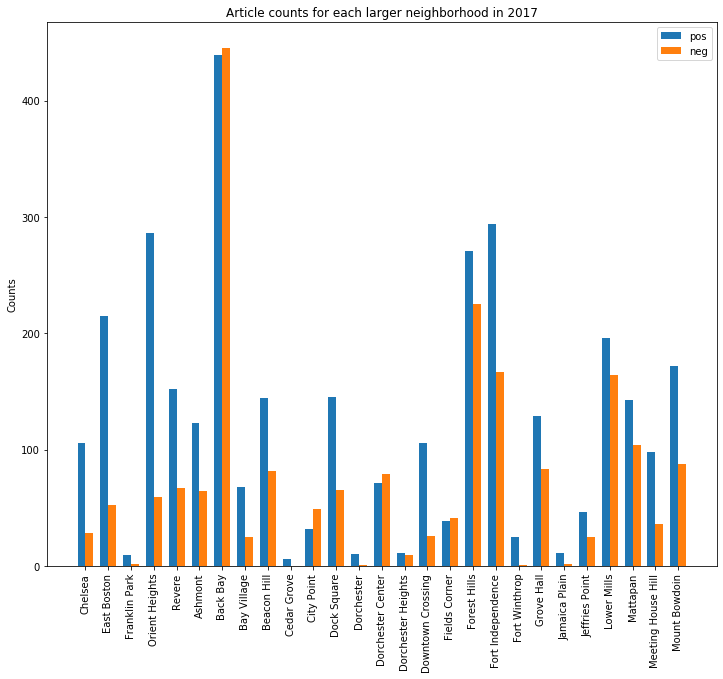

globe_ 2018


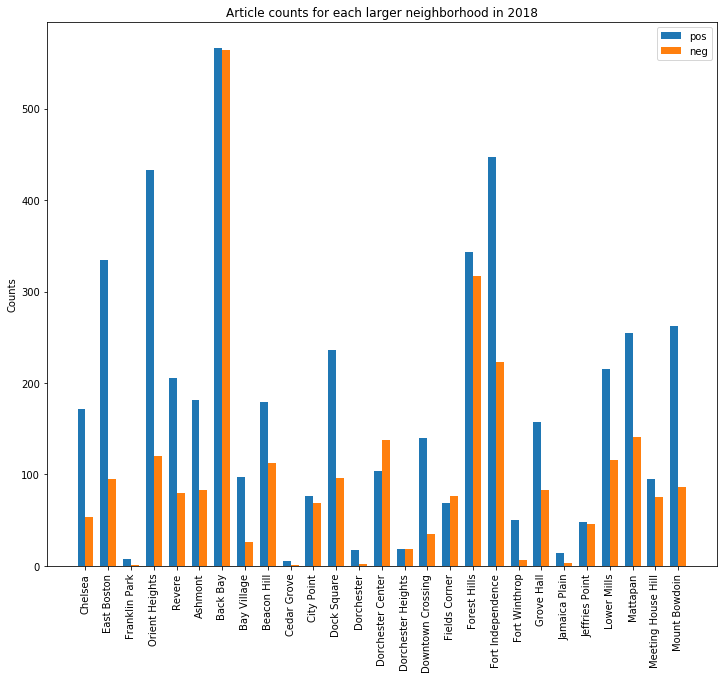

In [22]:
year = 2014
for df in dfs:
    plt_df = get_loc_plot_data(df)
    print('globe_',year)
    draw_loc_plot(plt_df, year)
    year += 1